# Plots of most systems

Results of runs overnight on 24 August.

Some of these are on `db37558`, while the `--qrange-initial` argument was added in `50e6236` and the `--parameter-radius-initial` argument was added in `e88ba81`, here are the diffs showing it doesn't matter: 
- https://github.com/czlee/jadeite/compare/db37558...50e6236
- https://github.com/czlee/jadeite/compare/50e6236...e88ba81



In [1]:
import matplotlib.pyplot as plt
from plotting import plot_averaged_training_charts, plot_comparison, make_axes, show_timestamp_info

In [2]:
common_specs = {
    'rounds':                   ('expect', 150),
    'batch_size':               ('expect', 64),
    'epochs':                   ('expect', 1),
    'ema_coefficient':          ('expect', 1 / 3),
    'save_squared_error':       ('expect', False),
    'send':                     ('expect', 'deltas'),
    'power':                    ('title',  1.0),
    'optimizer_client':         ('expect', 'sgd'),
    'clients':                  ('title',  20),
    'noise':                    ('series', '__all__'),
    'lr_scheduler_client':      ('expect', 'none'),
}
base_analog_specs = common_specs.copy()
base_analog_specs.update({
    'script': 'dynpower.py',
    'power_update_period':      ('expect', 1),
    'power_factor':             ('expect', 0.9),
    # I forgot that earlier results used a different power quantile, so plot both for comparison here
    'power_quantile':           ('series', '__all__'),
    'parameter_radius_initial': ('expect', 1.0, {'missing-treat-as': 1.0}),
})
base_digital_specs = common_specs.copy()
base_digital_specs.update({
    'script': 'dynquant.py',
    'qrange_update_period':     ('expect', 1),
    'qrange_param_quantile':    ('series', 1.0),
    'qrange_client_quantile':   ('expect', 1.0),
    'qrange_initial':           ('expect', 1.0, {'missing-treat-as': 1.0}),  # added in 50e6
    'channel_uses':             ('expect', None),
    'rounding_method':          ('expect', 'stochastic'),
    'parameter_schedule':       ('expect', 'staggered'),
    'zero_bits_strategy':       ('expect', 'read-zero'),
})

# epsilon, $n = 5$

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **23 Aug 2021, 09:51:06** | 23 Aug 2021, 09:56:17 | 5 min 11 s |
| last to finish | 25 Aug 2021, 00:03:17 | **25 Aug 2021, 00:08:21** | 5 min 04 s |
| shortest | 24 Aug 2021, 23:37:44 | 24 Aug 2021, 23:42:44 | **5 min 00 s** |
| longest | 24 Aug 2021, 21:05:39 | 24 Aug 2021, 21:20:24 | **14 min 44 s** |


- Skipping 62 runs that don't match on 1 keys: clients (62)
- Skipping 30 runs that don't match on 1 keys: clients (30)


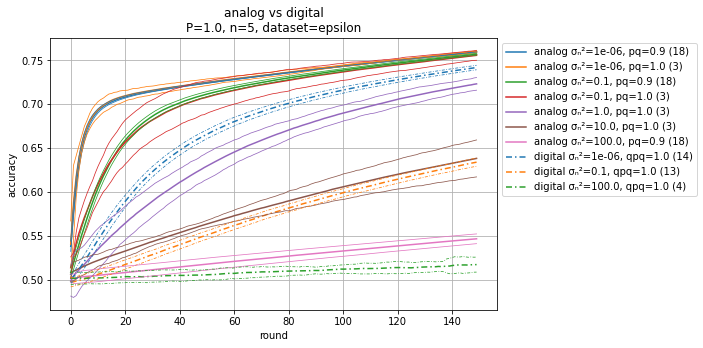

In [3]:
paths = [
    "results/20210823-epsilon-analog",
    "results/20210824-epsilon-1",
    "results/20210824-epsilon-2",
    "results/20210824-epsilon-hinoise-1",
    "results/20210824-epsilon-hinoise-2",
]
epsilon_specs = {
    'dataset':                ('title',  'epsilon'),
    'lr_client':              ('expect', 0.01),
    'momentum_client':        ('expect', 0.0),
    'weight_decay_client':    ('expect', 0.0),
    'data_per_client':        ('expect', 20000),
    'clients':                ('title',  5),
}

analog_specs = base_analog_specs.copy()
digital_specs = base_digital_specs.copy()
analog_specs.update(epsilon_specs)
digital_specs.update(epsilon_specs)

show_timestamp_info(paths)
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=['confints'])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

- Skipping 116 runs that don't match on 2 keys: power_quantile (107), clients (62)
- Skipping 30 runs that don't match on 1 keys: clients (30)


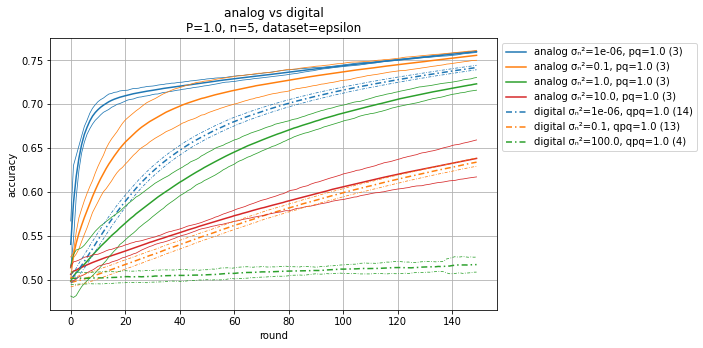

In [4]:
analog_specs['power_quantile'] = ('series', 1.0)
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=['confints'])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# epsilon, $n = 20$

- Skipping 66 runs that don't match on 1 keys: clients (66)
- Skipping 31 runs that don't match on 1 keys: clients (31)


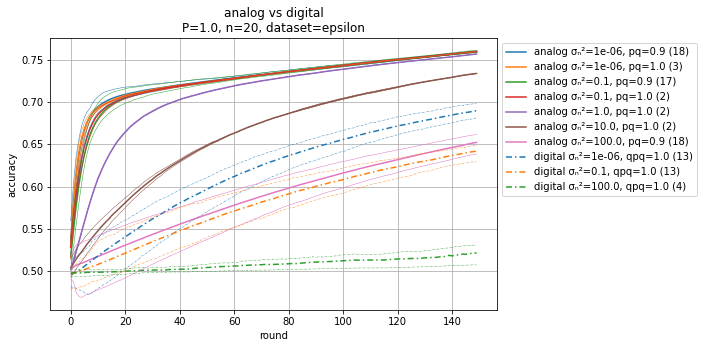

In [5]:
analog_specs = base_analog_specs.copy()
digital_specs = base_digital_specs.copy()
analog_specs.update(epsilon_specs)
digital_specs.update(epsilon_specs)
analog_specs['clients'] = ('title', 20)
digital_specs['clients'] = ('title', 20)
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=['range'])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

- Skipping 119 runs that don't match on 2 keys: power_quantile (107), clients (66)
- Skipping 31 runs that don't match on 1 keys: clients (31)


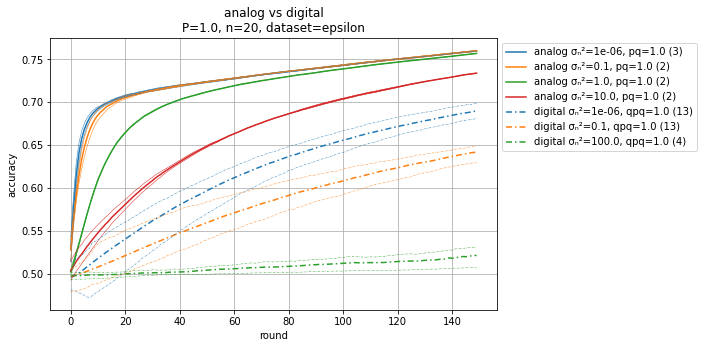

In [6]:
analog_specs['power_quantile'] = ('series', 1.0)
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=['range'])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

<div class="alert alert-info"><strong>epsilon:</strong> Use <code>-N=1</code> as the "high" noise level (for both $n=5$ and $n=20$).</div>

# Fashion-MNIST CNN2

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **23 Aug 2021, 05:08:56** | 23 Aug 2021, 05:52:25 | 43 min 29 s |
| last to finish | 24 Aug 2021, 18:03:17 | **24 Aug 2021, 18:26:40** | 23 min 23 s |
| shortest | 24 Aug 2021, 16:19:59 | 24 Aug 2021, 16:42:34 | **22 min 34 s** |
| longest | 24 Aug 2021, 07:23:35 | 24 Aug 2021, 08:12:43 | **49 min 08 s** |


- Skipping 2 runs that don't match on 1 keys: noise (2)


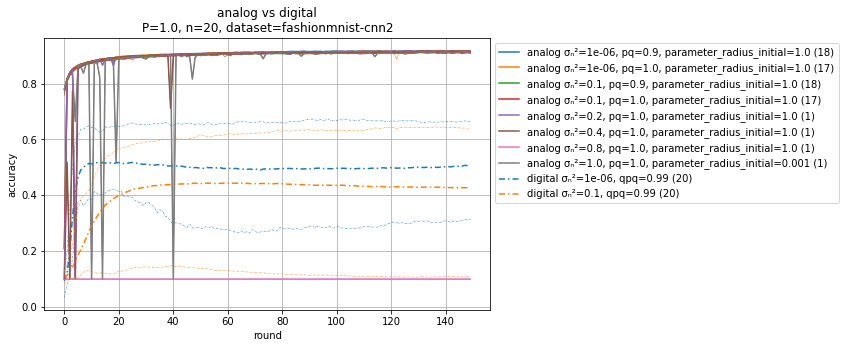

In [7]:
paths = [
    "results/20210823-fmnist-cnn2/20210823-050856",
    "results/20210823-fmnist-cnn2/20210823-050856a",
    "results/20210823-fmnist-cnn2/20210823-050856b",
    "results/20210824-fashionmnist-cnn2",
    "results/20210824-fashionmnist-cnn2-hinoise"
]
fmnist_cnn2_specs = {
    'dataset':                ('title',  'fashionmnist-cnn2'),
    'momentum_client':        ('expect', 0.0),
    'weight_decay_client':    ('expect', 0.0),
    'data_per_client':        ('expect', None),
    'clients':                ('title',  20),
}

analog_specs = base_analog_specs.copy()
analog_specs.update(fmnist_cnn2_specs)
analog_specs.update({
    'lr_client':                ('expect', 0.05),
    'parameter_radius_initial': ('series', '__all__', {'missing-treat-as': 1.0}),
    'noise':                    ('series', lambda x: x <= 1),
})

digital_specs = base_digital_specs.copy()
digital_specs.update(fmnist_cnn2_specs)
digital_specs.update({
    'lr_client':                ('expect', 0.01),
    'qrange_param_quantile':    ('series', '__all__'),
})

show_timestamp_info(paths)
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=['range'])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

- Skipping 41 runs that don't match on 2 keys: power_quantile (36), noise (5)


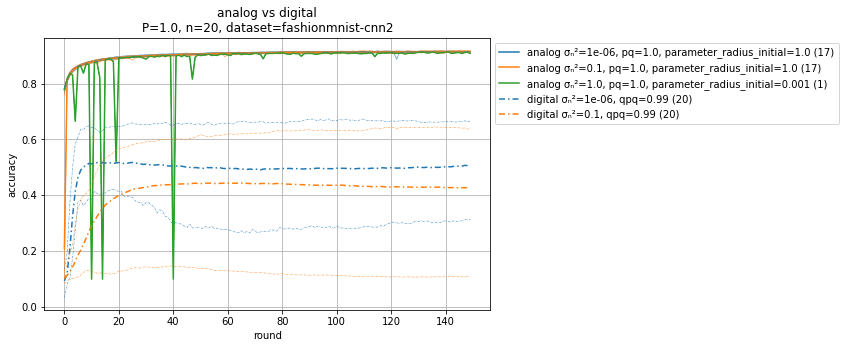

In [8]:
analog_specs.update({
    'power_quantile':           ('series', 1.0),
    'parameter_radius_initial': ('series', '__all__', {'missing-treat-as': 1.0}),
    'noise':                    ('series', [1e-6, 1e-1, 1.0])
})

plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=['range'])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

- Skipping 73 runs that don't match on 2 keys: parameter_radius_initial (73), power_quantile (36)


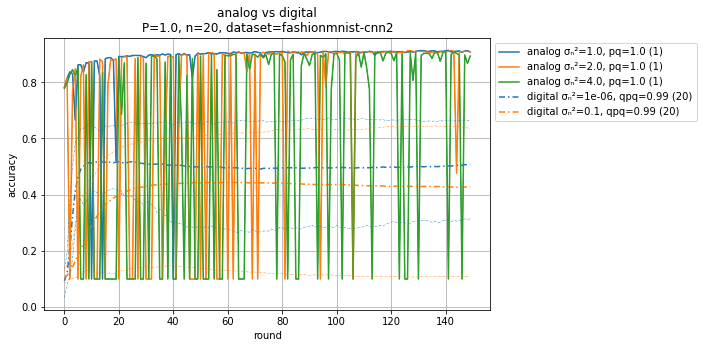

In [9]:
analog_specs.update({
    'power_quantile':           ('series', 1.0),
    'parameter_radius_initial': ('filter', 0.001, {'missing-treat-as': 1.0}),
    'noise':                    ('series', '__all__'),
})
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=['range'])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

Hilariously, there doesn't seem to be a noise level that just degrades the perfomance here. When it gets into the intermediate zone, it just swings wildly between "useless" and "close to noiseless" performance, as demonstrated by the $\sigma_\mathrm{n}^2 = 2$ and $\sigma_\mathrm{n}^2 = 4$ line above. The $\sigma_\mathrm{n}^2 = 1$ looks shaky enough though.

<div class="alert alert-info"><strong>Fashion-MNIST CNN:</strong> Use <code>-N=1</code> as the "high" noise level.</div>

# CIFAR-10 simple

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **23 Aug 2021, 09:35:48** | 23 Aug 2021, 10:21:38 | 45 min 50 s |
| last to finish | 25 Aug 2021, 01:08:59 | **25 Aug 2021, 01:51:02** | 42 min 02 s |
| shortest | 25 Aug 2021, 00:00:28 | 25 Aug 2021, 00:41:04 | **40 min 36 s** |
| longest | 24 Aug 2021, 20:51:37 | 24 Aug 2021, 21:38:35 | **46 min 58 s** |


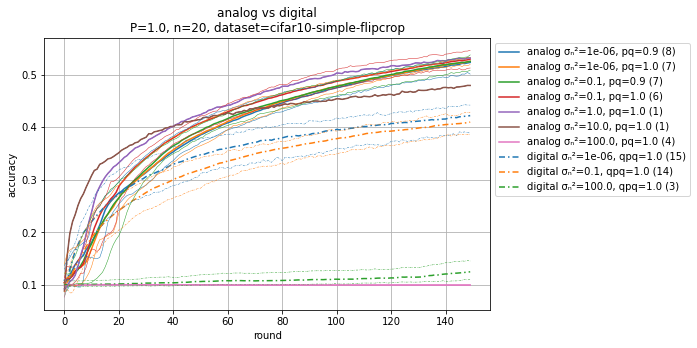

In [10]:
paths = [
    "results/20210823-cifar10-simple/20210823-093547a",
    "results/20210824-cifar10-simple-1",
    "results/20210824-cifar10-simple-2",
    "results/20210824-cifar10-simple-hinoise-1",
]
cifar10_simple_specs = {
    'dataset':                ('title',  'cifar10-simple-flipcrop'),
    'lr_client':              ('expect', 0.001),
    'momentum_client':        ('expect', 0.9),
    'weight_decay_client':    ('expect', 0.0),
    'data_per_client':        ('expect', None),
    'clients':                ('title',  20),
}

analog_specs = base_analog_specs.copy()
digital_specs = base_digital_specs.copy()
analog_specs.update(cifar10_simple_specs)
digital_specs.update(cifar10_simple_specs)

show_timestamp_info(paths)
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=['range'])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

- Skipping 15 runs that don't match on 1 keys: power_quantile (15)


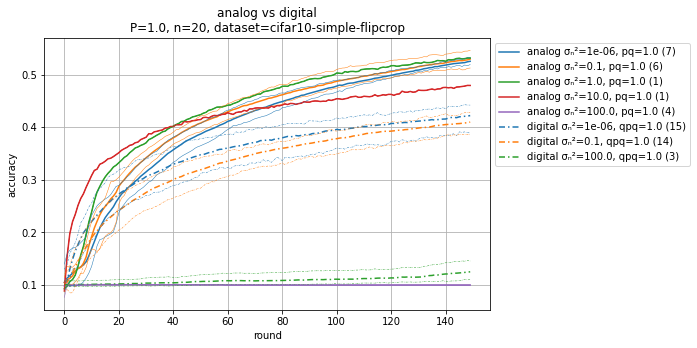

In [11]:
analog_specs['power_quantile'] = ('series', 1.0)
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=['range'])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

Interesting that high noise levels help it at the beginning, and then hinder it later on.

<div class="alert alert-info"><strong>CIFAR-10 simple:</strong> Use <code>-N=10</code> as the "high" noise level.</div>

# CIFAR-10 ResNet

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **23 Aug 2021, 02:18:01** | 23 Aug 2021, 03:29:27 | 1 h 11 min 26 s |
| last to finish | 24 Aug 2021, 17:02:46 | **24 Aug 2021, 18:24:21** | 1 h 21 min 35 s |
| shortest | 23 Aug 2021, 03:29:27 | 23 Aug 2021, 04:36:07 | **1 h 06 min 39 s** |
| longest | 24 Aug 2021, 09:05:14 | 24 Aug 2021, 10:30:57 | **1 h 25 min 42 s** |


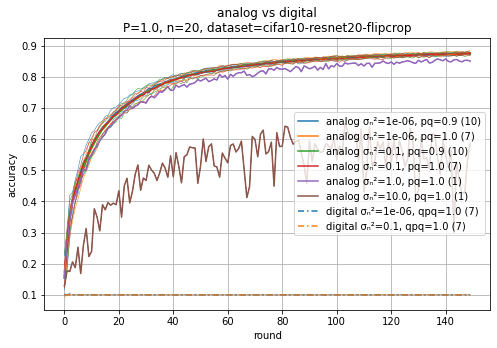

In [12]:
paths = [
    "results/20210823-cifar10-resnet20/20210823-021800",
    "results/20210823-cifar10-resnet20/20210823-021800c",
    "results/20210824-cifar10-resnet20",
    "results/20210824-cifar10-resnet20-hinoise",
]
cifar10_simple_specs = {
    'dataset':                ('title',  'cifar10-resnet20-flipcrop'),
    'lr_client':              ('expect', 0.1),
    'momentum_client':        ('expect', 0.9),
    'weight_decay_client':    ('expect', 1e-4),
    'data_per_client':        ('expect', None),
    'clients':                ('title',  20),
    'batch_size':             ('expect', 128),
}
analog_specs = base_analog_specs.copy()
digital_specs = base_digital_specs.copy()
analog_specs.update(cifar10_simple_specs)
digital_specs.update(cifar10_simple_specs)

show_timestamp_info(paths)
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=['range'])

- Skipping 20 runs that don't match on 1 keys: power_quantile (20)


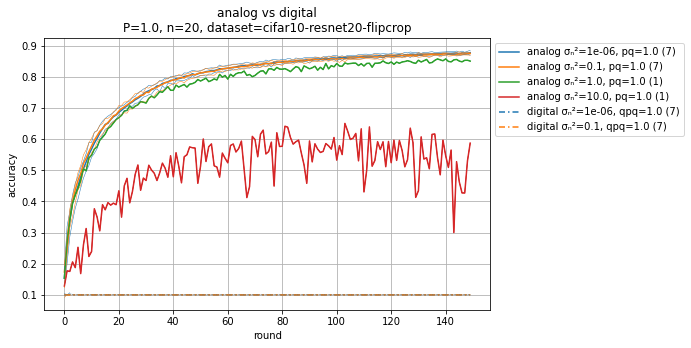

In [13]:
analog_specs['power_quantile'] = ('series', 1.0)
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=['range'])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

The $\sigma_\mathrm{n}^2 = 1$ is a little worse; $\sigma_\mathrm{n}^2 = 10$ is clearer.

<div class="alert alert-info"><strong>CIFAR-10 ResNet:</strong> Use <code>-N=10</code> as the "high" noise level.</div>